In [74]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings # Supress warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt # Visualization
import numpy as np

df = pd.read_csv("./files/interpolated_data.csv", index_col=0)
df.index = pd.to_datetime(df.index, format = '%Y-%m-%d')

In [75]:
df

,Rainfall,Depth_to_Groundwater,Temperature,Drainage_Volume,River_Hydrometry
Date,,,,,
2009-01-01,0.0,-31.14,5.2,-24530.688,2.4
2009-01-02,0.0,-31.11,2.3,-28785.888,2.5
2009-01-03,0.0,-31.07,4.4,-25766.208,2.4
2009-01-04,0.0,-31.05,0.8,-27919.296,2.4
2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3
...,...,...,...,...,...
2020-06-26,0.0,-25.07,25.7,-29930.688,2.5
2020-06-27,0.0,-25.11,26.2,-31332.960,2.4
2020-06-28,0.0,-25.19,26.9,-32120.928,2.4


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

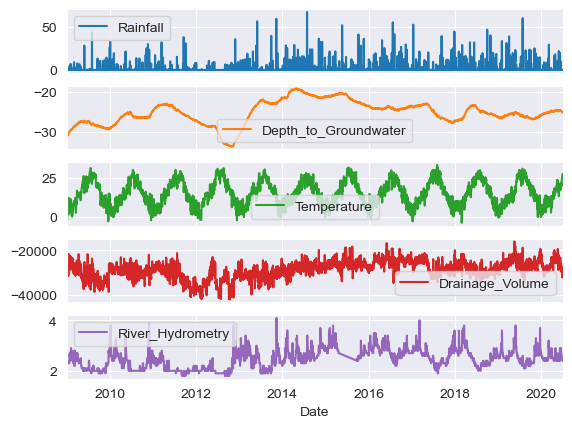

In [76]:
df.plot(subplots=True)

For the naive approach, the prediction for the next day should be the value of the current day.

In [30]:
naive_prediction = df.shift(1)
naive_prediction.iloc[0,:] = df.iloc[0,:] # fill first day
#last_row = df.iloc[-1,:]
#last_row.name = datetime(2020,7,1)
#naive_prediction = naive_prediction.append(last_row)

In [31]:
naive_prediction

,Rainfall,Depth_to_Groundwater,Temperature,Drainage_Volume,River_Hydrometry
Date,,,,,
2009-12-31,261.5,-28.534493,14.798082,-31037.213984,2.202740
2010-12-31,261.5,-28.534493,14.798082,-31037.213984,2.202740
2011-12-31,376.3,-26.519205,13.983836,-29564.633688,2.376712
2012-12-31,257.8,-24.612192,14.704658,-31088.076362,2.098904
2013-12-31,160.9,-30.436161,15.233060,-34295.667934,2.100000
2014-12-31,548.2,-24.245315,14.653425,-30921.781216,2.429315
2015-12-31,958.2,-20.516137,15.429589,-27811.352811,2.648767
2016-12-31,552.6,-21.605781,15.607945,-26159.441622,2.724384
2017-12-31,942.4,-24.081093,15.154645,-25008.503607,2.789344


In [8]:
def plot_predictions(start=0, end=4200):
    fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(20, 35))
    for series in range(0,5):
        naive_prediction.iloc[start:end,series].plot(ax = ax[series], legend=True, label=df.iloc[:,series].name+' Prediction')
        df.iloc[start:end,series].plot(ax = ax[series], legend=True, label=df.iloc[:,series].name+' Actual')
    plt.show()

In [ ]:
plot_predictions(600)

In [32]:
naive_prediction.to_csv('predictions/naive/yearly.csv')
saved_results = pd.read_csv('predictions/naive/yearly.csv', index_col=0)
saved_results.index = pd.to_datetime(saved_results.index, format = '%Y-%m-%d')
saved_results

,Rainfall,Depth_to_Groundwater,Temperature,Drainage_Volume,River_Hydrometry
Date,,,,,
2009-12-31,261.5,-28.534493,14.798082,-31037.213984,2.202740
2010-12-31,261.5,-28.534493,14.798082,-31037.213984,2.202740
2011-12-31,376.3,-26.519205,13.983836,-29564.633688,2.376712
2012-12-31,257.8,-24.612192,14.704658,-31088.076362,2.098904
2013-12-31,160.9,-30.436161,15.233060,-34295.667934,2.100000
2014-12-31,548.2,-24.245315,14.653425,-30921.781216,2.429315
2015-12-31,958.2,-20.516137,15.429589,-27811.352811,2.648767
2016-12-31,552.6,-21.605781,15.607945,-26159.441622,2.724384
2017-12-31,942.4,-24.081093,15.154645,-25008.503607,2.789344


In [33]:
metrics = {}
def calc_metrics(name):

    results = pd.DataFrame(data={'Predictions':saved_results[name], 'Actuals':df[name]}, index=df.index)

    # Step 2: Calculate the differences between the predicted and actual values
    results['Difference'] = results['Actuals'] - results['Predictions']

    # Step 3: Calculate squared differences for RMSE
    results['Squared_difference'] = results['Difference'] ** 2

    # Step 4: Calculate absolute differences for MAE and MAPE
    results['Absolute_difference'] = np.abs(results['Difference'])
    results['Absolute_percentage_difference'] = np.abs(results['Difference'] / results['Actuals'])

    # Step 5: Compute the metrics
    rmse = np.sqrt(results['Squared_difference'].mean())
    mae = results['Absolute_difference'].mean()
    mape = results['Absolute_percentage_difference'].mean() * 100  # to get the percentage
    return rmse, mae, mape

for column in df.columns:

    rmse, mae, mape = calc_metrics(column)
    metrics[column] = {
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape
    }
metrics_df = pd.DataFrame(metrics)
metrics_df.to_csv('metrics/naive/yearly.csv')